<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_2_4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.4_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,87.678713,61.900558,97.328740,-0.000016,256.907996,256.908039,-0.000043
1,0.0,1.0,21.275202,37.704863,41.496480,-0.000222,110.476322,110.476530,-0.000208
2,0.0,2.0,49.654208,54.354697,71.962472,0.000050,185.971427,185.971383,0.000044
3,0.0,3.0,70.752056,95.344000,71.218985,0.000003,247.315043,247.315048,-0.000004
4,0.0,4.0,23.567963,69.945248,68.758424,-0.000004,172.271631,172.271628,0.000003
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,28.517155,98.257525,68.055741,0.000011,204.830432,204.830416,0.000016
249996,999.0,246.0,63.863912,27.669752,88.717567,0.000222,190.251454,190.251264,0.000190
249997,999.0,247.0,55.267126,95.641173,55.953661,0.000017,216.861977,216.861947,0.000030
249998,999.0,248.0,48.496218,73.736049,96.898963,-0.000023,229.131206,229.131243,-0.000037


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    87.678713  61.900558  97.328740  ...  256.907996  256.908039 -0.000043
      1.0    21.275202  37.704863  41.496480  ...  110.476322  110.476530 -0.000208
      2.0    49.654208  54.354697  71.962472  ...  185.971427  185.971383  0.000044
      3.0    70.752056  95.344000  71.218985  ...  247.315043  247.315048 -0.000004
      4.0    23.567963  69.945248  68.758424  ...  172.271631  172.271628  0.000003
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  28.517155  98.257525  68.055741  ...  204.830432  204.830416  0.000016
      246.0  63.863912  27.669752  88.717567  ...  190.251454  190.251264  0.000190
      247.0  55.267126  95.641173  55.953661  ...  216.861977  216.861947  0.000030
      248.0  48.496218  73.736049  96.898963  ...  229.131206  229.131243 -0.000037
      249.0  44.523311  77.976851  80.631842  ...  213.131952  213.132010 -0.000058

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    87.678713  61.900558  97.328740  ...  256.907996  256.908039 -0.000043
      1.0    21.275202  37.704863  41.496480  ...  110.476322  110.476530 -0.000208
      2.0    49.654208  54.354697  71.962472  ...  185.971427  185.971383  0.000044
      3.0    70.752056  95.344000  71.218985  ...  247.315043  247.315048 -0.000004
      4.0    23.567963  69.945248  68.758424  ...  172.271631  172.271628  0.000003
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  28.517155  98.257525  68.055741  ...  204.830432  204.830416  0.000016
      246.0  63.863912  27.669752  88.717567  ...  190.251454  190.251264  0.000190
      247.0  55.267126  95.641173  55.953661  ...  216.861977  216.861947  0.000030
      248.0  48.496218  73.736049  96.898963  ...  229.131206  229.131243 -0.000037
      249.0  44.523311  77.976851  80.631842  ...  213.131952  213.132010 -0.000058

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,87.678713,61.900558,97.328740,-0.000016,256.907996,256.908039,-0.000043
1,0.0,1.0,21.275202,37.704863,41.496480,-0.000222,110.476322,110.476530,-0.000208
2,0.0,2.0,49.654208,54.354697,71.962472,0.000050,185.971427,185.971383,0.000044
3,0.0,3.0,70.752056,95.344000,71.218985,0.000003,247.315043,247.315048,-0.000004
4,0.0,4.0,23.567963,69.945248,68.758424,-0.000004,172.271631,172.271628,0.000003
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,28.517155,98.257525,68.055741,0.000011,204.830432,204.830416,0.000016
249996,999.0,246.0,63.863912,27.669752,88.717567,0.000222,190.251454,190.251264,0.000190
249997,999.0,247.0,55.267126,95.641173,55.953661,0.000017,216.861977,216.861947,0.000030
249998,999.0,248.0,48.496218,73.736049,96.898963,-0.000023,229.131206,229.131243,-0.000037


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    87.678713  61.900558  97.328740  ...  256.907996  256.908039 -0.000043
      1.0    21.275202  37.704863  41.496480  ...  110.476322  110.476530 -0.000208
      2.0    49.654208  54.354697  71.962472  ...  185.971427  185.971383  0.000044
      3.0    70.752056  95.344000  71.218985  ...  247.315043  247.315048 -0.000004
      4.0    23.567963  69.945248  68.758424  ...  172.271631  172.271628  0.000003
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  28.517155  98.257525  68.055741  ...  204.830432  204.830416  0.000016
      246.0  63.863912  27.669752  88.717567  ...  190.251454  190.251264  0.000190
      247.0  55.267126  95.641173  55.953661  ...  216.861977  216.861947  0.000030
      248.0  48.496218  73.736049  96.898963  ...  229.131206  229.131243 -0.000037
      249.0  44.523311  77.976851  80.631842  ...  213.131952  213.132010 -0.000058

[250000 rows x 7 columns]

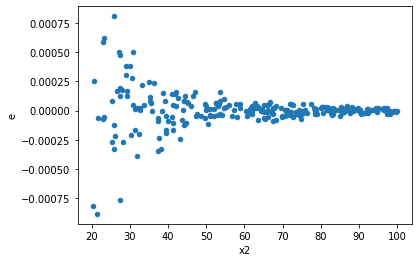

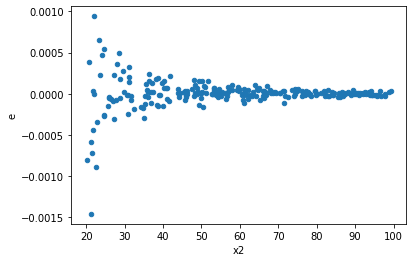

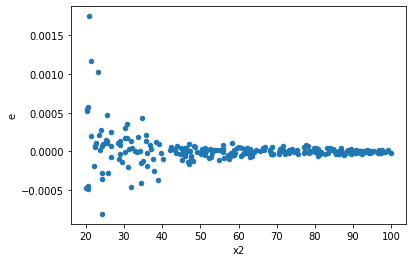

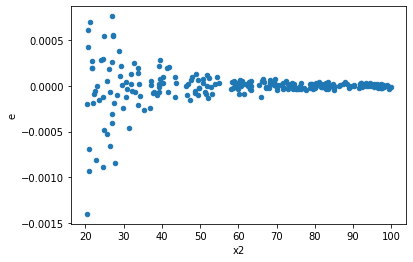

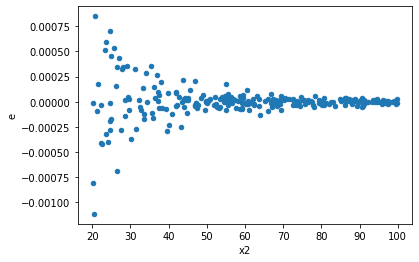

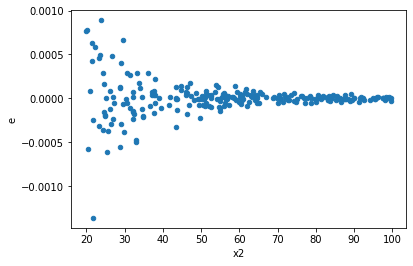

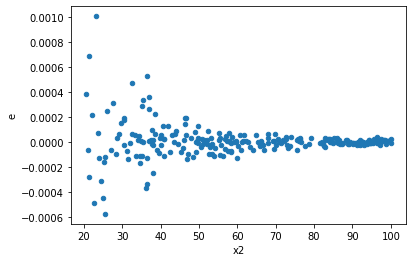

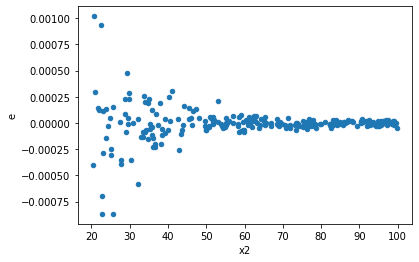

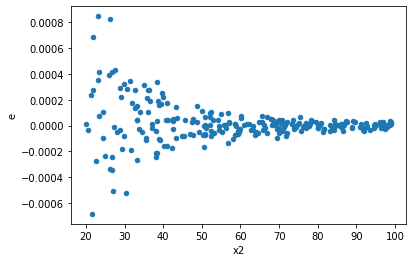

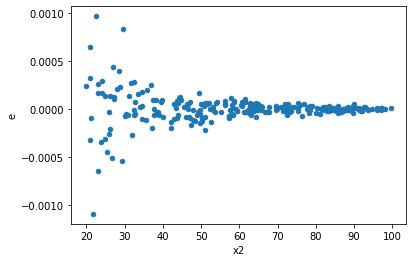

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,124.0,120.0,3.1641707427779634e-06,3.942527310497359e-06,2.5724965388438727e-08,3.313048160081814e-08,1.2875237206501835,0.16369332758101995,0.91815333620949,Reject001=1 : Homoscedasticity
3.0,130.0,114.0,1.7894954976725944e-07,5.897290525827706e-06,1.387205812149298e-09,5.218841173298855e-08,37.580314859332994,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
4.0,118.0,126.0,1.6385564336194226e-06,2.3999323062105027e-06,1.4004755842901048e-08,1.919945844968402e-08,1.3716681377175912,0.08322719456929883,0.9583864027153506,Reject001=1 : Homoscedasticity
5.0,113.0,131.0,3.921071313827873e-06,6.881134583729954e-06,3.500956530203458e-08,5.2931804490230414e-08,1.5137789395327157,0.024137054423769122,0.9879314727881154,Reject001=1 : Homoscedasticity
6.0,115.0,129.0,2.5098796036056477e-06,3.276747295763157e-06,2.2016487750926736e-08,2.5599588248149663e-08,1.1638531609165688,0.40664196882735837,0.7966790155863208,Reject001=1 : Homoscedasticity
8.0,124.0,120.0,9.078855219672528e-07,4.1618745939961205e-06,7.381183105424819e-09,3.497373608400101e-08,4.736944959547936,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
10.0,129.0,115.0,1.0181735063043057e-07,6.287116447436774e-06,7.954480518002388e-10,5.515014427576117e-08,69.26623500830058,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
11.0,105.0,139.0,2.651492746624193e-06,5.8051923609967004e-06,2.5495122563694163e-08,4.206661131157029e-08,1.653867338198738,0.007098252837761443,0.9964508735811193,Reject001=0 : Heteroscedasticity
14.0,121.0,123.0,1.7481250153303283e-06,5.597166556150321e-06,1.4567708461086069e-08,4.5878414394674765e-08,3.1497493998153687,7.633755849667523e-10,0.9999999996183122,Reject001=0 : Heteroscedasticity


In [17]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,124.0,120.0,3.1641707427779634e-06,3.942527310497359e-06,2.5724965388438727e-08,3.313048160081814e-08,1.2875237206501835,0.16369332758101995,Reject001=1 : Homoscedasticity
1.0,117.0,127.0,5.224738703360314e-06,3.2208343747556907e-06,4.504085089103719e-08,2.5562177577426117e-08,0.5679184237406996,0.0018739818339348923,Reject001=0 : Heteroscedasticity
2.0,127.0,117.0,4.859741303143289e-06,2.6134933327993975e-06,3.856937542177214e-08,2.253011493792584e-08,0.5837489393713959,0.0033509895477845334,Reject001=0 : Heteroscedasticity
3.0,130.0,114.0,1.7894954976725944e-07,5.897290525827706e-06,1.387205812149298e-09,5.218841173298855e-08,37.580314859332994,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
4.0,118.0,126.0,1.6385564336194226e-06,2.3999323062105027e-06,1.4004755842901048e-08,1.919945844968402e-08,1.3716681377175912,0.08322719456929883,Reject001=1 : Homoscedasticity
5.0,113.0,131.0,3.921071313827873e-06,6.881134583729954e-06,3.500956530203458e-08,5.2931804490230414e-08,1.5137789395327157,0.024137054423769122,Reject001=1 : Homoscedasticity
6.0,115.0,129.0,2.5098796036056477e-06,3.276747295763157e-06,2.2016487750926736e-08,2.5599588248149663e-08,1.1638531609165688,0.40664196882735837,Reject001=1 : Homoscedasticity
7.0,123.0,121.0,1.2072858284645057e-05,9.996694249979257e-08,9.89578547921726e-08,8.330578541649381e-10,0.008417169013410775,1.575168133614747e-91,Reject001=0 : Heteroscedasticity
8.0,124.0,120.0,9.078855219672528e-07,4.1618745939961205e-06,7.381183105424819e-09,3.497373608400101e-08,4.736944959547936,2.220446049250313e-16,Reject001=0 : Heteroscedasticity


In [18]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    677
Reject001=1 : Homoscedasticity      323
Name: Result_test, dtype: int64